In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/User/Downloads/archive (5)/HousingData.csv")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
print(df.head())



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [5]:
print(df.describe())
print(df.info())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df = df.fillna(df.mean())

In [8]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
X = df.drop('MEDV', axis=1)
Y = df['MEDV']
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [11]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):

            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        
        return y_pred 

In [12]:
X = df.iloc[:,2].values.reshape(-1,1) # assuming the first column is the feature
y = df.iloc[:,3]

In [13]:

#X, y = df.make_regression(n_samples=100, n_features=1, noise=200, random_state=4)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

In [14]:
reg = LinearRegression(lr=0.001,n_iters=10000)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [15]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
import sklearn.metrics
import math
r2score = r2_score(y_test, predictions)
mse= sklearn.metrics.mean_squared_error(y_test,predictions)
rmse = math.sqrt(mse)
print('R2score:', r2score)
print('y_test-predictions',rmse)

R2score: 0.009650698787178169
y_test-predictions 0.23415598872709883


In [16]:
wos_r2 = r2score

In [17]:
wos_r2

0.009650698787178169

In [18]:
import time

In [19]:
linear_regression = LinearRegression()

start_time = time.time()
linear_regression.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time

In [20]:
N = X_train.shape[0]  # Number of samples in the training set
d = X_train.shape[1]  # Number of features
time_complexity = elapsed_time / (N**2 * d)

In [21]:
print("Time complexity of fitting a linear regression model on the Boston Housing dataset is {:.10f}".format(time_complexity))

Time complexity of fitting a linear regression model on the Boston Housing dataset is 0.0000184172


In [22]:
from itertools import product

# define hyperparameters to tune
lr = [0.001, 0.01, 0.1]
n_iters = [1000, 5000, 10000]

# create all possible combinations of hyperparameters
hyperparameters = list(product(lr, n_iters))

# initialize best r2score and corresponding hyperparameters
best_r2score = 0
best_hyperparameters = None

# loop over all hyperparameters
for hyperparameter in hyperparameters:
    # create a new instance of LinearRegression with the current hyperparameters
    lr = LinearRegression(lr=hyperparameter[0], n_iters=hyperparameter[1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
    
    y_train = np.array(y_train).reshape((-1, 1))
    # fit the model
    lr.fit(X_train, y_train)
 
    
    # evaluate the model on the validation set
    y_pred = lr.predict(X_test)
    r2score=r2_score(y_test, predictions)
    
    # update best accuracy and corresponding hyperparameters
    if r2score > best_r2score:
        best_r2score= r2score
        best_hyperparameters = hyperparameter
        
# print the best hyperparameters and corresponding accuracy
print("Best hyperparameters:", best_hyperparameters)
print("Validation r2score:", best_r2score)

Best hyperparameters: (0.001, 1000)
Validation r2score: 0.009650698787178169


In [23]:
hyper = r2score

In [24]:
hyper

0.009650698787178169

# using sklearn

In [33]:


from sklearn.metrics import r2_score


In [34]:

#X, y = df.make_regression(n_samples=100, n_features=1, noise=200, random_state=4)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

In [37]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R21 score is {}'.format(r2))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 0.2534322238158977
R21 score is 0.0004018433144713507




In [38]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r22 = r2_score(y_test, y_test_predict)


In [39]:
import time


In [40]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 0.23463166888512876
R2 score is 0.0004018433144713507


In [41]:
ws_r2= r22

In [42]:
ws_r2

0.005622887958488754

In [43]:


start_time = time.time()
linear_regression.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time

In [44]:
N = X_train.shape[0]  # Number of samples in the training set
d = X_train.shape[1]  # Number of features
time_complexity = elapsed_time / (N**2 * d)

In [45]:
print("Time complexity of fitting a linear regression model on the Boston Housing dataset is {:.10f}".format(time_complexity))

Time complexity of fitting a linear regression model on the Boston Housing dataset is 0.0000307195


NameError: name 'model_names' is not defined

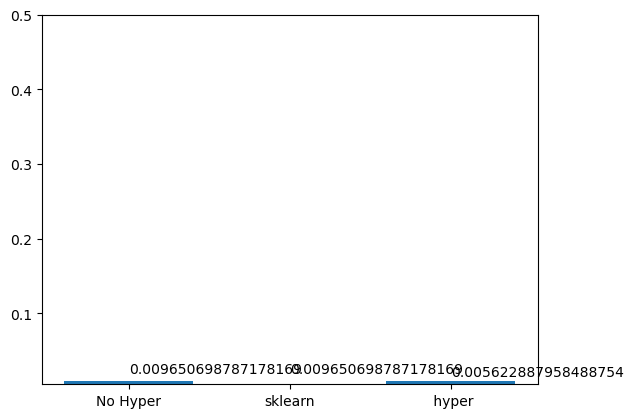

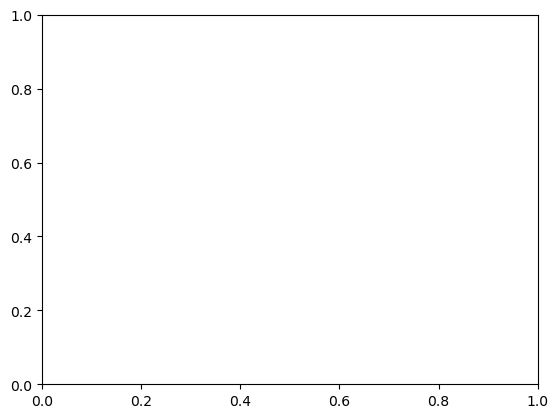

In [46]:
import matplotlib.pyplot as plt
no_hyper = wos_r2
hyper=hyper
sklearn=ws_r2



# Create the bar plot
plt.bar(["No Hyper", "sklearn", " hyper"], [no_hyper,sklearn,  hyper])


plt.text(0, no_hyper + 0.01, str(no_hyper))
plt.text(1, hyper+ 0.01, str(hyper))
plt.text(2, sklearn + 0.01, str(sklearn))

plt.ylim(0.005,0.5)

# Create a bar chart of the r2 scores
fig, ax = plt.subplots()
ax.bar(model_names, r2)

# Set the chart title and labels
ax.set_title('Model r2 Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('r2')



# Show the chart
plt.show()

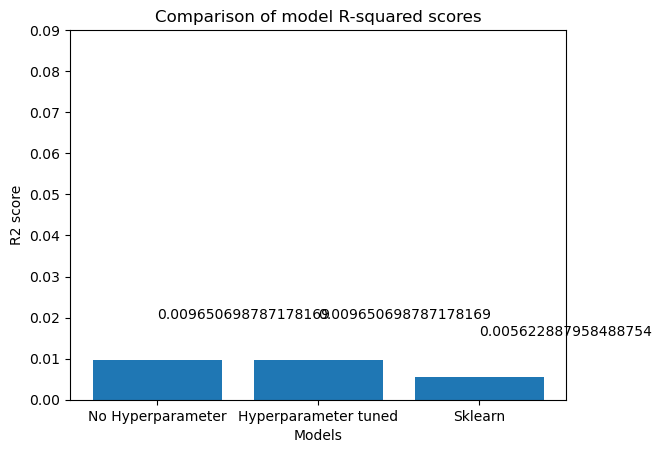

In [52]:
import matplotlib.pyplot as plt

# Define the values for the bars
no_hyperparam = wos_r2
hyperparam_tuned = hyper
sklearn = ws_r2

# Create the bar plot
plt.bar(["No Hyperparameter", "Hyperparameter tuned", "Sklearn"], [no_hyperparam, hyperparam_tuned, sklearn])

# Add annotations to the bars
plt.text(0, no_hyperparam + 0.01, str(no_hyperparam))
plt.text(1, hyperparam_tuned + 0.01, str(hyperparam_tuned))
plt.text(2, sklearn + 0.01, str(sklearn))

# Set the y-axis limits
plt.ylim(0, 0.09)

# Add labels to the plot
plt.xlabel("Models")
plt.ylabel("R2 score")
plt.title("Comparison of model R-squared scores")

# Display the plot
plt.show()
